In [1]:
# Importing Required Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing the Dataset
df = pd.read_excel('Restaurant_food_cost/Data_Train.xlsx')
df.shape

(12690, 9)

In [4]:
#Importing test Dataset
df_test = pd.read_excel('Restaurant_food_cost/Data_Test.xlsx')
df_test.shape

(4231, 8)

In [5]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12690 non-null  object
 1   RESTAURANT_ID  12690 non-null  int64 
 2   CUISINES       12690 non-null  object
 3   TIME           12690 non-null  object
 4   CITY           12578 non-null  object
 5   LOCALITY       12592 non-null  object
 6   RATING         12688 non-null  object
 7   VOTES          11486 non-null  object
 8   COST           12690 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 892.4+ KB


In [7]:
df.describe()

,RESTAURANT_ID,COST
count,12690.000000,12690.000000
mean,7759.134121,655.252246
std,4504.874150,627.003540
min,0.000000,20.000000
25%,3863.250000,300.000000
50%,7740.000000,500.000000
75%,11688.750000,800.000000
max,15573.000000,14000.000000


In [8]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

All the columns having empty values are qualitative. Hence have to impute them with mode

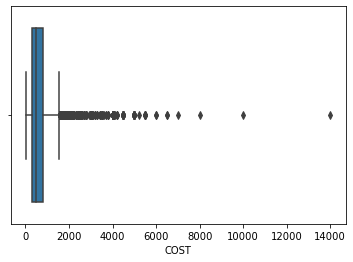

In [9]:
sns.boxplot(x=df['COST'])

Lots of outliers are there in the data.

In [73]:
df.nunique()

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
dtype: int64

In [10]:
df_ml = df.copy()
test = df_test.copy()

In [11]:
df_ml.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [12]:
#Dropping the unnecessary columns

In [13]:
#Using Label encoder to convert  from categorical to Numeric
from sklearn.preprocessing import LabelEncoder
lbl=LabelEncoder()

In [14]:
df_ml.columns[df_ml.dtypes == object]   # All the Categorical variables

Index(['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY', 'RATING', 'VOTES'], dtype='object')

In [15]:
df_ml.nunique()

TITLE              113
RESTAURANT_ID    11892
CUISINES          4155
TIME              2689
CITY               359
LOCALITY          1416
RATING              32
VOTES             1847
COST                86
dtype: int64

## Preprocessing for Train as well as Test Data 

In [16]:
# Fitting the data from both train and test after that transforming them
lbl.fit(list(df_ml['TITLE'].astype(str))+list(test['TITLE'].astype(str)))
df_ml['TITLE'] = lbl.transform(df_ml['TITLE'].astype(str))
test['TITLE'] = lbl.transform(test['TITLE'].astype(str))

lbl.fit(list(df_ml['CUISINES'].astype(str))+list(test['CUISINES'].astype(str)))
df_ml['CUISINES'] = lbl.transform(df_ml['CUISINES'].astype(str))
test['CUISINES'] = lbl.transform(test['CUISINES'].astype(str))

lbl.fit(list(df_ml['TIME'].astype(str))+list(test['TIME'].astype(str)))
df_ml['TIME'] = lbl.transform(df_ml['TIME'].astype(str))
test['TIME'] = lbl.transform(test['TIME'].astype(str))

lbl.fit(list(df_ml['CITY'].astype(str))+list(test['CITY'].astype(str)))
df_ml['CITY'] = lbl.transform(df_ml['CITY'].astype(str))
test['CITY'] = lbl.transform(test['CITY'].astype(str))

lbl.fit(list(df_ml['LOCALITY'].astype(str))+list(test['LOCALITY'].astype(str)))
df_ml['LOCALITY'] = lbl.transform(df_ml['LOCALITY'].astype(str))
test['LOCALITY'] = lbl.transform(test['LOCALITY'].astype(str))

In [17]:
df_ml.RATING.unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [18]:
# Replacing symbols with nan
df_ml.RATING = df_ml.RATING.replace(to_replace='-', value=np.nan)
df_ml.RATING = df_ml.RATING.replace(to_replace= 'NEW', value=np.nan)

In [19]:
df_ml.RATING = df_ml.RATING.astype(float)

In [20]:
# Replacing symbols with nan
test.RATING = test.RATING.replace(to_replace='-', value=np.nan)
test.RATING = test.RATING.replace(to_replace= 'NEW', value=np.nan)

In [21]:
test.RATING = test.RATING.astype(float)

In [22]:
df_ml.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY                0
LOCALITY            0
RATING           1204
VOTES            1204
COST                0
dtype: int64

In [23]:
df_ml.RATING = df_ml.RATING.fillna(df_ml.RATING.mean())

In [24]:
test.RATING = test.RATING.fillna(test.RATING.mean())

In [25]:
df_ml.VOTES.unique()

array(['49 votes', '30 votes', '221 votes', ..., '2723 votes',
       '1426 votes', '1214 votes'], dtype=object)

In [26]:
df_ml

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,34,9438,3294,898,400,328,3.6,49 votes,1200
1,36,13198,364,2301,75,1214,4.2,30 votes,1500
2,34,10915,3729,806,75,1272,3.8,221 votes,800
3,104,6346,5156,340,277,161,4.1,24 votes,800
4,55,15387,2218,750,277,709,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,104,13228,3676,1401,160,395,3.8,546 votes,500
12686,36,9686,2684,1445,277,158,4.3,1214 votes,1800
12687,79,11133,2617,1391,300,1548,4.0,608 votes,1300
12688,34,6134,4400,2244,75,720,3.5,32 votes,400


In [27]:
# Preprocessing the Column votes into numbers by removing string 'votes'
votes = []
for i in list(df_ml.VOTES):
    if type(i) == str:
        k = float(i.strip(' votes'))
    else:
        k = i
    votes.append(k)

In [28]:
df_ml.VOTES = votes

In [29]:
votes2 = []
for i in list(test.VOTES):
    if type(i) == str:
        k = float(i.strip(' votes'))
    else:
        k = i
    votes2.append(k)

In [30]:
test.VOTES = votes2

In [31]:
df_ml.VOTES = df_ml.VOTES.fillna(df_ml.VOTES.mean())

In [32]:
test.VOTES = test.VOTES.fillna(test.VOTES.mean())

In [34]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12690 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12690 non-null  int32  
 1   RESTAURANT_ID  12690 non-null  int64  
 2   CUISINES       12690 non-null  int32  
 3   TIME           12690 non-null  int32  
 4   CITY           12690 non-null  int32  
 5   LOCALITY       12690 non-null  int32  
 6   RATING         12690 non-null  float64
 7   VOTES          12690 non-null  float64
 8   COST           12690 non-null  int64  
dtypes: float64(2), int32(5), int64(2)
memory usage: 644.5 KB


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          4231 non-null   int32  
 1   RESTAURANT_ID  4231 non-null   int64  
 2   CUISINES       4231 non-null   int32  
 3   TIME           4231 non-null   int32  
 4   CITY           4231 non-null   int32  
 5   LOCALITY       4231 non-null   int32  
 6   RATING         4231 non-null   float64
 7   VOTES          4231 non-null   float64
dtypes: float64(2), int32(5), int64(1)
memory usage: 181.9 KB


Restaurant_ID is not required for ML model

In [36]:
df_ml = df_ml.drop('RESTAURANT_ID',axis=1)
test = test.drop('RESTAURANT_ID',axis=1)

### Dealing with outliers

Now, we have converted all the data into numbers we can deal with outliers using z-score

In [37]:
from scipy import stats
z = np.abs(stats.zscore(df_ml))
print(z)

[[0.86695351 0.32682135 0.59310216 ... 0.46184081 0.45735622 0.86884552]
 [0.81115705 1.61282987 0.92653179 ... 1.03237172 0.48105544 1.34733058]
 [0.86695351 0.61479004 0.69275029 ... 0.03623004 0.24281588 0.23086546]
 ...
 [0.38846695 0.12135062 0.05911817 ... 0.53430088 0.23989988 1.02834054]
 [0.86695351 1.05899003 0.86479328 ... 0.71087623 0.47856079 0.40711461]
 [0.86695351 0.58897216 0.468542   ... 0.95991165 0.32596548 0.08812458]]


In [38]:
threshold = 3
print(np.where(z > 3))

(array([   84,   159,   186,   196,   208,   293,   303,   304,   308,
         337,   344,   354,   379,   422,   431,   469,   502,   510,
         563,   599,   672,   731,   775,   796,   839,   852,   855,
         872,   913,   966,   967,   973,  1008,  1020,  1034,  1038,
        1132,  1133,  1147,  1151,  1193,  1244,  1288,  1345,  1346,
        1395,  1467,  1470,  1475,  1476,  1522,  1540,  1594,  1617,
        1632,  1657,  1681,  1685,  1759,  1773,  1778,  1816,  1828,
        1850,  1878,  1884,  1916,  1930,  1931,  1973,  2068,  2090,
        2100,  2111,  2188,  2204,  2205,  2207,  2268,  2302,  2305,
        2333,  2339,  2349,  2369,  2459,  2488,  2531,  2604,  2610,
        2622,  2683,  2686,  2689,  2695,  2740,  2778,  2886,  2905,
        2921,  2940,  2969,  2973,  2977,  3002,  3028,  3033,  3036,
        3049,  3170,  3197,  3206,  3211,  3289,  3309,  3333,  3338,
        3396,  3397,  3398,  3408,  3483,  3491,  3492,  3507,  3526,
        3528,  3532

In [39]:
print('Before removing Outliers, Shape of Dataset:', df_ml.shape)
df_ml = df_ml[(z < 3).all(axis=1)]

Before removing Outliers, Shape of Dataset: (12690, 8)


In [40]:
print('After removing Outliers, Shape of Dataset:', df_ml.shape)

After removing Outliers, Shape of Dataset: (12202, 8)


In [43]:
df_ml.describe()

,TITLE,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,65.360924,2798.590559,1439.488608,177.658007,762.764137,3.778005,345.296101,591.308884
std,36.163795,1516.048261,928.430822,109.801706,465.006142,0.384091,436.901064,445.761458
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.600000,4.000000,20.000000
25%,34.000000,1475.000000,681.000000,75.000000,389.000000,3.600000,62.000000,300.000000
50%,62.000000,3044.000000,1372.000000,160.000000,674.000000,3.800000,191.000000,450.000000
75%,104.000000,4063.000000,2265.000000,277.000000,1175.000000,4.000000,415.668901,700.000000
max,122.000000,5182.000000,3294.000000,450.000000,1636.000000,4.900000,2811.000000,2500.000000


In [45]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12202 entries, 0 to 12689
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     12202 non-null  int32  
 1   CUISINES  12202 non-null  int32  
 2   TIME      12202 non-null  int32  
 3   CITY      12202 non-null  int32  
 4   LOCALITY  12202 non-null  int32  
 5   RATING    12202 non-null  float64
 6   VOTES     12202 non-null  float64
 7   COST      12202 non-null  int64  
dtypes: float64(2), int32(5), int64(1)
memory usage: 619.6 KB


## Regression Model

In [47]:
X = df_ml.drop('COST',axis = 1).values    # Attributes

In [49]:
y = df_ml['COST'].values     # The target variable

In [50]:
# Splitting into training and Test dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

In [51]:
# Importing some regression models and performance metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [52]:
# Models taken for Regression 
model_list = [LinearRegression(),DecisionTreeRegressor(),RandomForestRegressor()]  

In [53]:
#Building Function for Model Testing
def reg_function(model_list):
    for model in model_list:
        model.fit(X_train,y_train)
        pred=model.predict(X_test)
        print('Model Name :', model)
        print('MAE:', metrics.mean_absolute_error(y_test, pred))
        print('MSE:', metrics.mean_squared_error(y_test, pred))
        print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)),'\n')

In [54]:
reg_function(model_list)

Model Name : LinearRegression()
MAE: 257.16554482777144
MSE: 144021.41564129372
RMSE: 379.5015357561728 

Model Name : DecisionTreeRegressor()
MAE: 220.49733715690292
MSE: 111195.1536255633
RMSE: 333.45937327591093 

Model Name : RandomForestRegressor()
MAE: 163.1951785958136
MSE: 57583.13013765149
RMSE: 239.9648518797107 



Best model is Random Forest Regressor

,Y Test,Pred
0,300,260.0
1,250,330.0
2,350,329.5
3,250,335.5
4,2200,1786.5


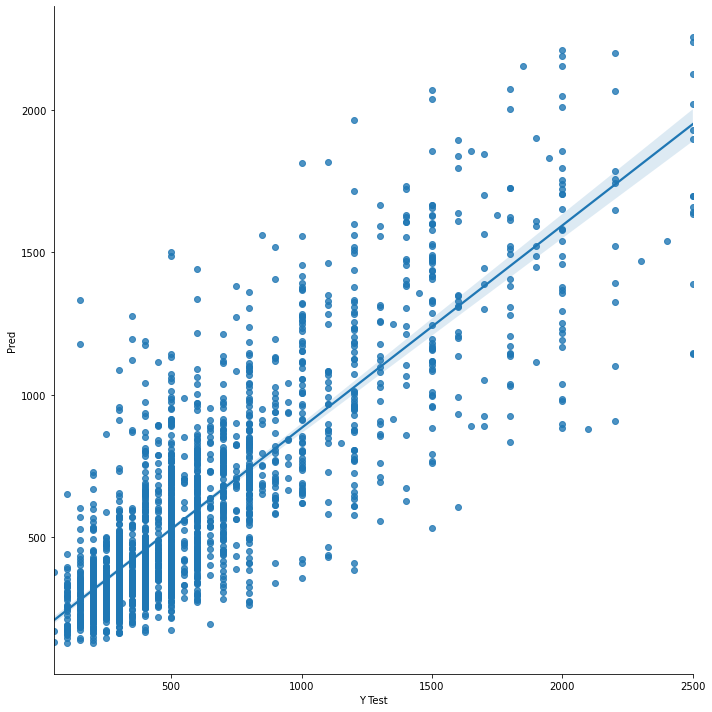

In [63]:
# Plotting Actual values vs Predicted Values for the Final Model
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train,y_train)
pred = RandomForest.predict(X_test)
pred_data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred', data = pred_data, height=10, aspect= 1)
pred_data.head()

In [64]:
RandomForest.score(X_test,y_test)

0.7063761264408444

In [71]:
#Importing Scaler
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
X_train_minmax = scaler.fit_transform(X_train)
X_test_minmax = scaler.transform(X_test)

REGRESSION SCORE : 0.705639407006204


,Y Test,Pred
0,300,260.0
1,250,330.0
2,350,329.5
3,250,335.5
4,2200,1786.5


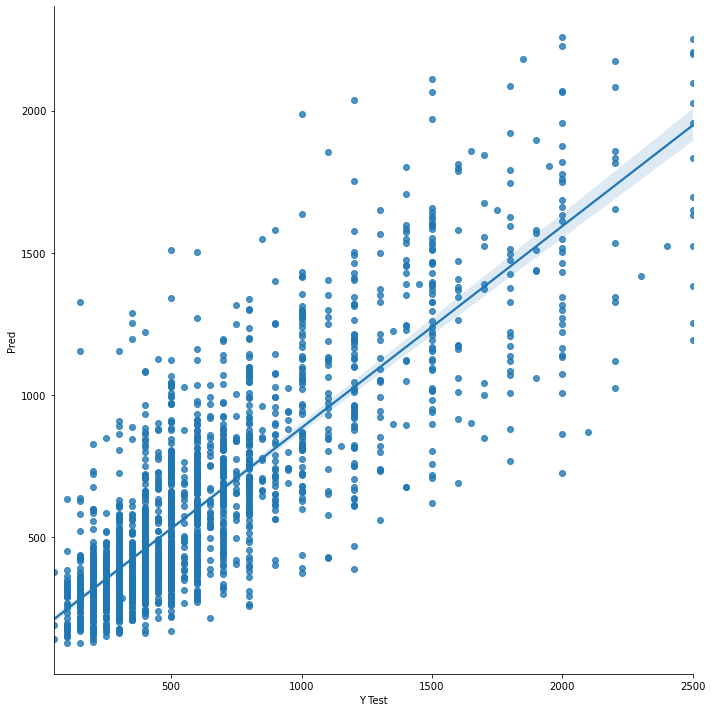

In [72]:
# Testing the Model again after Scaling
RandomForest = RandomForestRegressor()
RandomForest.fit(X_train_minmax,y_train)
pred = RandomForest.predict(X_test_minmax)
pred_data2 = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred', data = pred_data2, height=10, aspect= 1)
print("REGRESSION SCORE :",RandomForest.score(X_test_minmax,y_test))
pred_data.head()